# EL MEKKI Hafsa
# The Sparks Foundation
# Task 1
# Prediction using Supervised Machine Learning


We have to predict the percentage of an student based on the no. of study hours.

# Importing libraries required

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


# Reading Data

In [22]:
df=pd.read_csv('student_scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Data Observation

In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the distribution

Visualize the data using the plot function

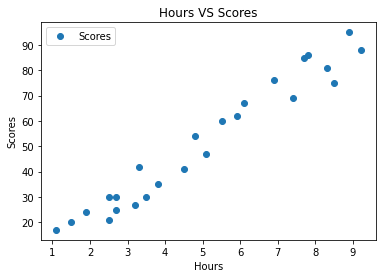

In [33]:
df.plot(x="Hours",y="Scores",style="o")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours VS Scores")
plt.show()

We can see a positive linear relation between the number of hours studied and percentage of score.

# Preparing the Data

Train_Test_Split of Data using sklearn

In [30]:
from sklearn.model_selection import train_test_split

Division of the data into "attributes" (inputs) and "labels" (outputs).

In [35]:
y=df['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [36]:
x = df['Hours'].values
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [41]:
x.shape

(25,)

In [42]:
x.ndim

1

In [45]:
x=x.reshape(-1,1)
print(x.shape)

(25, 1)


In [46]:
#splitting the data into training and testing  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Importing LinearRegression model from linear_model

In [47]:
from sklearn.linear_model import LinearRegression

In [71]:
Lr=LinearRegression()

In [72]:
Lr.fit(x_train,y_train)

LinearRegression()

In [73]:
y_train_pred = Lr.predict(x_train)
y_train_pred

array([84.99777959, 26.92081783, 77.25418469, 46.27980508, 74.3503366 ,
       33.69646337, 21.11312165, 91.77342513, 88.86957704, 69.51058979,
       39.50415954, 34.66441273, 13.36952675, 28.85671655, 52.08750126,
       28.85671655, 78.22213405, 36.60031145, 59.83109616, 17.2413242 ])

# Plotting the line of regression

Visualize the best fit line of regression

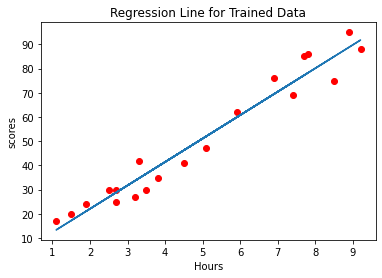

In [74]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,y_train_pred)
plt.xlabel('Hours')
plt.ylabel('scores')
plt.title("Regression Line for Trained Data")
plt.show()

# Making predictions

In [78]:
print(x_test)
y_pred = Lr.predict(x_test)

[[6.1]
 [4.8]
 [5.5]
 [8.3]
 [2.5]]


In [76]:
df1 = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})
df1

,Actual,Predicted
0,67,61.766995
1,54,49.183653
2,60,55.959299
3,81,83.061881
4,21,26.920818


In [91]:
#Train and test score
print(f"Training score : {Lr.score(x_train,y_train)}")
print(f"Testing score : {Lr.score(x_test,y_test)}")

Training score : 0.9530998227581691
Testing score : 0.9466035377595583


# What will be predicted score if a student studies for 9.25 hrs/ day?


In [87]:
hours = np.array(9.25)
hours=hours.reshape(-1, 1)
score_pred = Lr.predict(hours)
print(f'No of hours is {hours[0][0]}')
print(f'Predicted score :{score_pred[0]}')


No of hours is 9.25
Predicted score :92.25739981148877


# Performance Metrics


In [92]:
from sklearn import metrics
print(f"Mean absolute error :{metrics.mean_absolute_error(y_test,y_pred)} ")
print(f"Mean Squared  error :{metrics.mean_squared_error(y_test,y_pred)} ")

Mean absolute error :4.414550385777462 
Mean Squared  error :21.243248537737315 
